Punkte:  [[5, 13], [10, 10], [5, 8], [12, 13], [13, 5], [2, 1], [12, 8], [12, 4], [0, 10], [6, 2]] 

Startpunkt für Weiszman Algorithmus:  [11, 8] 

10 Iterationen:  [(10.046185354215925, 7.822562990091656), (9.39214823215006, 7.796308008302334), (9.024852922453496, 7.795415862775882), (8.81942949407173, 7.788910040277975), (8.702331286496463, 7.7799025239040684), (8.634558830166554, 7.772025370533326), (8.59494785196653, 7.766284182576521), (8.571656987686886, 7.762455196909604), (8.55791244298589, 7.760020713162276), (8.549783685353615, 7.758514439002138)] 

Fermatpunkt:  (8.549783685353615, 7.758514439002138) 



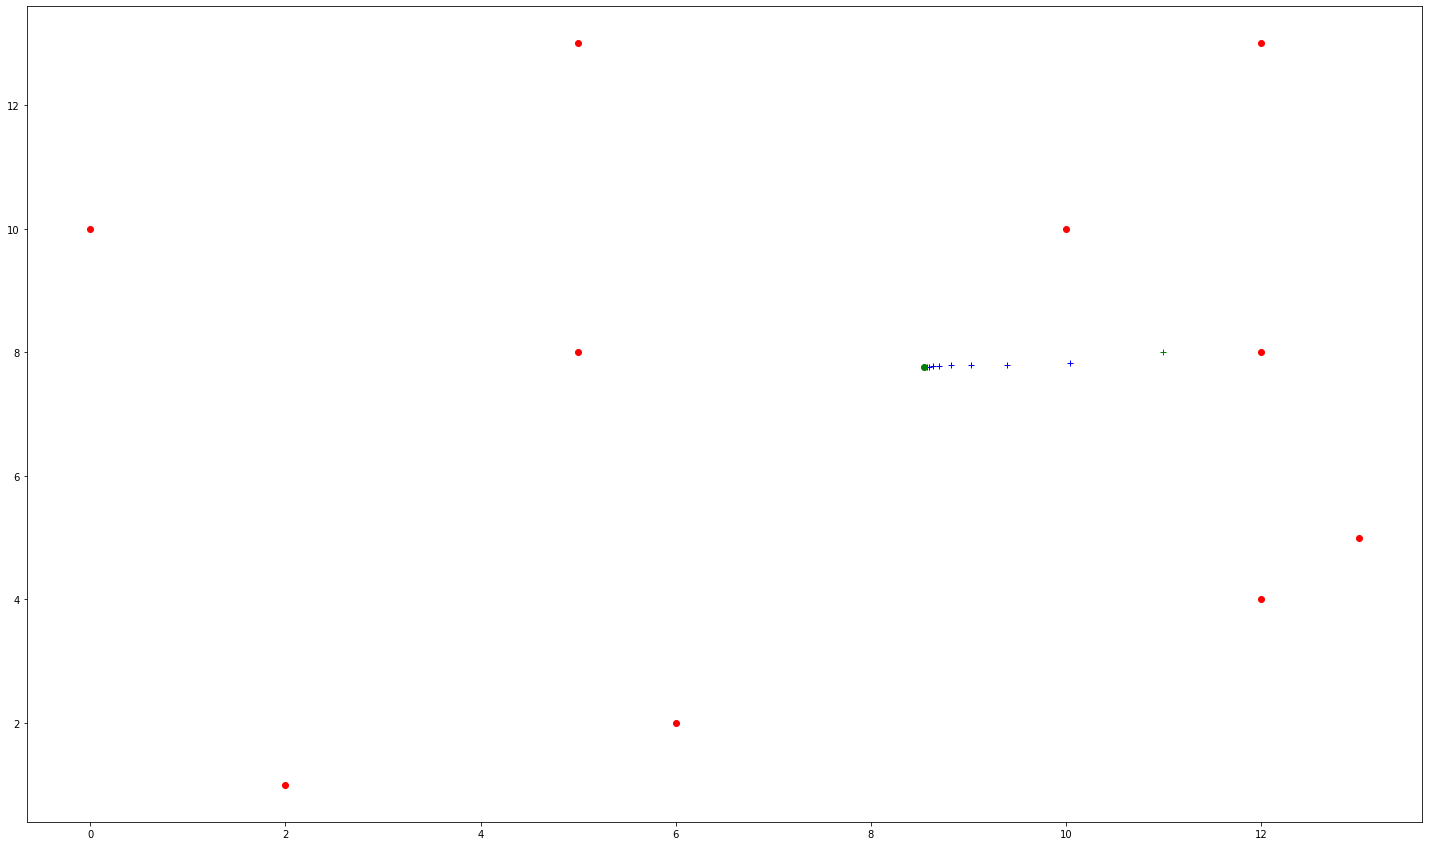

In [1]:
from math import *
%matplotlib inline
import pylab
import numpy as np
import random

pylab.rcParams['figure.figsize'] = [25, 15]

NUMBER_OF_POINTS = 10
EPSILON = 0.01

def distanz(a,b):
    return sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    

def schwerpunkt(punkte):
    x0=y0=0.0
    n = len(punkte)
    for P in punkte:
        x0=x0+P[0]
        y0=y0+P[1]
    return (x0/n,y0/n)



def WeiszmanIteration(P, punkte):
    """
    Return a new approximation to the geometric median 
    of `points` by applying one iteration of Weiszfeld's 
    algorithm to the old appromixation P.
    """
    W = x = y = 0.0
    for Q in punkte:
        d = distanz(P, Q)
        if d != 0:
            w = 1.0 / d
            W += w
            x += Q[0] * w
            y += Q[1] * w
    return x / W, y / W


def fermatpunkt(punkte, startpunkt, epsilon):
    """
    Return an approximation to the geometric median for 
    `points`. Start with the centroid and apply Weiszfeld's 
    algorithm until the distance between steps is less 
    than `epsilon`.
    """
    iterationen = []
    P = startpunkt
    while True:
        Q = WeiszmanIteration(P, punkte)
        iterationen.append(Q) 
        if distanz(P, Q) < epsilon:
            return Q, iterationen
        P = Q
        
def getRandomPoint():
    return [random.randrange(0, 15), random.randrange(0, 15)]
        
# Initialisierung der Punkte
Punkte = []
for x in range(NUMBER_OF_POINTS):
    punkt = getRandomPoint()
    Punkte.append(punkt)
    pylab.plot(punkt[0], punkt[1], 'ro')

startpunkt = getRandomPoint()
pylab.plot(startpunkt[0], startpunkt[1], 'g+')

print ("Punkte: ", Punkte, "\n")
print ("Startpunkt für Weiszman Algorithmus: ", startpunkt, "\n") 
ergebnis, iterationen = fermatpunkt(Punkte, startpunkt, EPSILON)
print (len(iterationen), "Iterationen: ", iterationen, "\n")
print ("Fermatpunkt: ", ergebnis, "\n") 


for x,y in iterationen:
    pylab.plot(x, y, 'b+')
pylab.plot(ergebnis[0], ergebnis[1], 'go')

pylab.show()